# **MORT Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

mort_ds_path = '../../datasets/CreditRiskAnalytics/mortgage.csv'
mort_prep_ds_path = '../../datasets/preprocessed/mort/'

(CVXPY) May 23 08:43:00 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 23 08:43:00 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(mort_prep_ds_path)

In [3]:
data = utilities.read_csv(mort_ds_path)
data

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.200,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.200,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.200,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.200,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.20,87.03,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,16,52,177,517107.42,57.659403,2.664,181.43,1.717053,6.6,1,0,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622485,50000,57,16,52,177,512274.57,55.359916,2.652,187.20,2.556052,6.2,1,0,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622486,50000,58,16,52,177,507396.72,54.492206,2.644,188.37,2.868594,6.2,1,0,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622487,50000,59,16,52,177,502478.87,54.171106,2.638,187.65,2.443648,5.7,1,0,0,0,664000.0,653,80.0,1.75,167.91,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-null  int64  
 14  inve

#### Drop useless and ambiguous features and all features not known to investors ex ante.

In [5]:
data.drop(['time', 'orig_time', 'first_time', 'mat_time', 'balance_time', 'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time'], axis=1, inplace=True)

In [6]:
data = data.groupby(['id']).max()

In [7]:
data['defaulted'] = False
data.loc[(data['status_time'] == 1) & (data['default_time'] == 1), 'defaulted'] = True

In [8]:
data.drop(['default_time', 'payoff_time', 'status_time'], axis=1, inplace=True)

#### Fix columns dtypes.

In [9]:
data['REtype_CO_orig_time'] = data['REtype_CO_orig_time'].astype('category')
data['REtype_PU_orig_time'] = data['REtype_PU_orig_time'].astype('category')
data['investor_orig_time'] = data['investor_orig_time'].astype('category')

In [10]:
data

,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,defaulted
id,,,,,,,,,,
1,0,0,1,0,45000.0,715,69.4,9.200,87.03,True
2,0,0,1,0,107200.0,558,80.0,7.680,186.91,False
3,0,0,1,0,48600.0,680,83.6,8.750,89.58,False
4,0,0,1,0,63750.0,587,81.8,10.500,97.99,False
5,0,0,1,0,52800.0,527,80.0,9.155,186.91,False
...,...,...,...,...,...,...,...,...,...,...
49996,0,0,0,1,82000.0,688,71.9,1.625,179.45,False
49997,0,0,0,0,331417.0,692,75.0,1.250,179.45,False
49998,0,0,0,0,166250.0,750,88.0,2.250,179.45,False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 50000
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   REtype_CO_orig_time      50000 non-null  category
 1   REtype_PU_orig_time      50000 non-null  category
 2   REtype_SF_orig_time      50000 non-null  int64   
 3   investor_orig_time       50000 non-null  category
 4   balance_orig_time        50000 non-null  float64 
 5   FICO_orig_time           50000 non-null  int64   
 6   LTV_orig_time            50000 non-null  float64 
 7   Interest_Rate_orig_time  50000 non-null  float64 
 8   hpi_orig_time            50000 non-null  float64 
 9   defaulted                50000 non-null  bool    
dtypes: bool(1), category(3), float64(4), int64(2)
memory usage: 2.9 MB


#### Plot features data types.

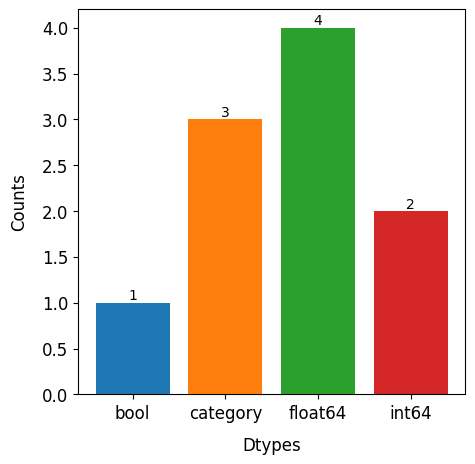

In [12]:
plotting.plot_dtypes_hist(data, save_path=mort_prep_ds_path)

#### Data cleaning.

In [13]:
before_data_cleaning_count = len(data)

#### Plot class distribution.

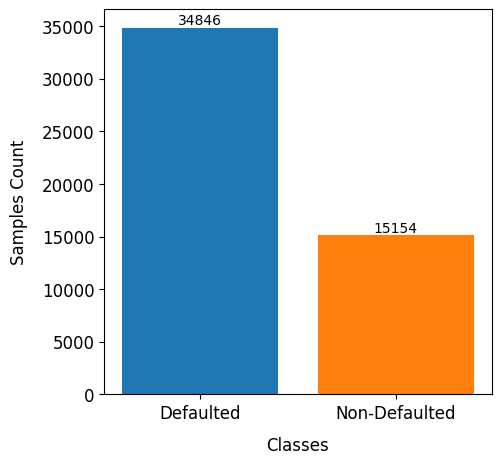

In [14]:
plotting.plot_class_distr_hist(data, save_path=mort_prep_ds_path)

#### Plot missing values histogram.

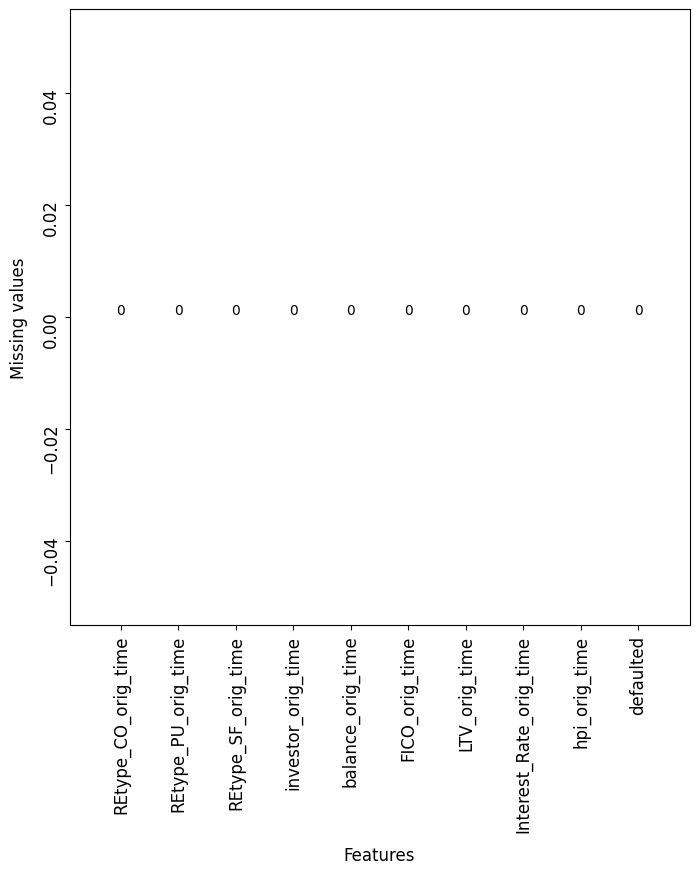

In [15]:
plotting.plot_missing_hist(data, figsize=(8,8), save_path=mort_prep_ds_path)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 50000
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   REtype_CO_orig_time      50000 non-null  category
 1   REtype_PU_orig_time      50000 non-null  category
 2   REtype_SF_orig_time      50000 non-null  int64   
 3   investor_orig_time       50000 non-null  category
 4   balance_orig_time        50000 non-null  float64 
 5   FICO_orig_time           50000 non-null  int64   
 6   LTV_orig_time            50000 non-null  float64 
 7   Interest_Rate_orig_time  50000 non-null  float64 
 8   hpi_orig_time            50000 non-null  float64 
 9   defaulted                50000 non-null  bool    
dtypes: bool(1), category(3), float64(4), int64(2)
memory usage: 2.9 MB


#### Apply optimal binninf and WoE.

In [17]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=mort_prep_ds_path,
                                                     verbose=True)



Processing feature: REtype_CO_orig_time.
2023-05-23 20:43:02,094 | INFO : Optimal binning started.
2023-05-23 20:43:02,094 | INFO : Options: check parameters.
2023-05-23 20:43:02,094 | INFO : Pre-processing started.
2023-05-23 20:43:02,095 | INFO : Pre-processing: number of samples: 50000
2023-05-23 20:43:02,096 | INFO : Pre-processing: number of clean samples: 50000
2023-05-23 20:43:02,096 | INFO : Pre-processing: number of missing samples: 0
2023-05-23 20:43:02,097 | INFO : Pre-processing: number of special samples: 0
2023-05-23 20:43:02,097 | INFO : Pre-processing: number of outlier samples: 0
2023-05-23 20:43:02,097 | INFO : Pre-processing: number of others samples: 0
2023-05-23 20:43:02,097 | INFO : Pre-processing: number of categories: 2
2023-05-23 20:43:02,097 | INFO : Pre-processing: number of categories others: 0
2023-05-23 20:43:02,098 | INFO : Pre-processing terminated. Time: 0.0016s
2023-05-23 20:43:02,098 | INFO : Pre-binning started.
2023-05-23 20:43:02,101 | INFO : Pre

In [18]:
data

,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,defaulted
id,,,,,,,,,,
1,0.003749,0.01048,0.001620,0.017802,0.422493,0.023485,0.620637,-0.432193,0.834084,True
2,0.003749,0.01048,0.001620,0.017802,0.106603,-0.145483,-0.214915,-0.407648,1.068886,False
3,0.003749,0.01048,0.001620,0.017802,0.422493,-0.153132,-0.051943,-0.432193,0.834084,False
4,0.003749,0.01048,0.001620,0.017802,0.111769,-0.179005,-0.051943,-0.432193,0.834084,False
5,0.003749,0.01048,0.001620,0.017802,0.422493,-0.105212,-0.214915,-0.432193,1.068886,False
...,...,...,...,...,...,...,...,...,...,...
49996,0.003749,0.01048,-0.002685,-0.128869,0.111769,0.023485,0.279597,0.042990,1.153601,False
49997,0.003749,0.01048,-0.002685,0.017802,-0.098035,0.023485,0.202926,0.042990,1.153601,False
49998,0.003749,0.01048,-0.002685,0.017802,0.086288,0.485976,-0.051943,0.042990,1.153601,False


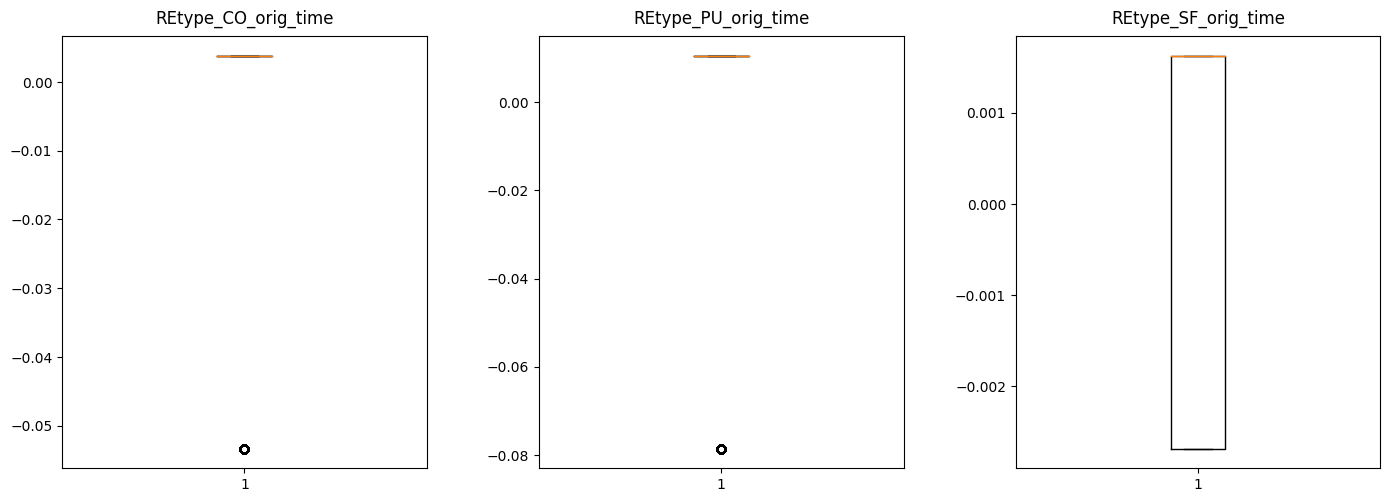

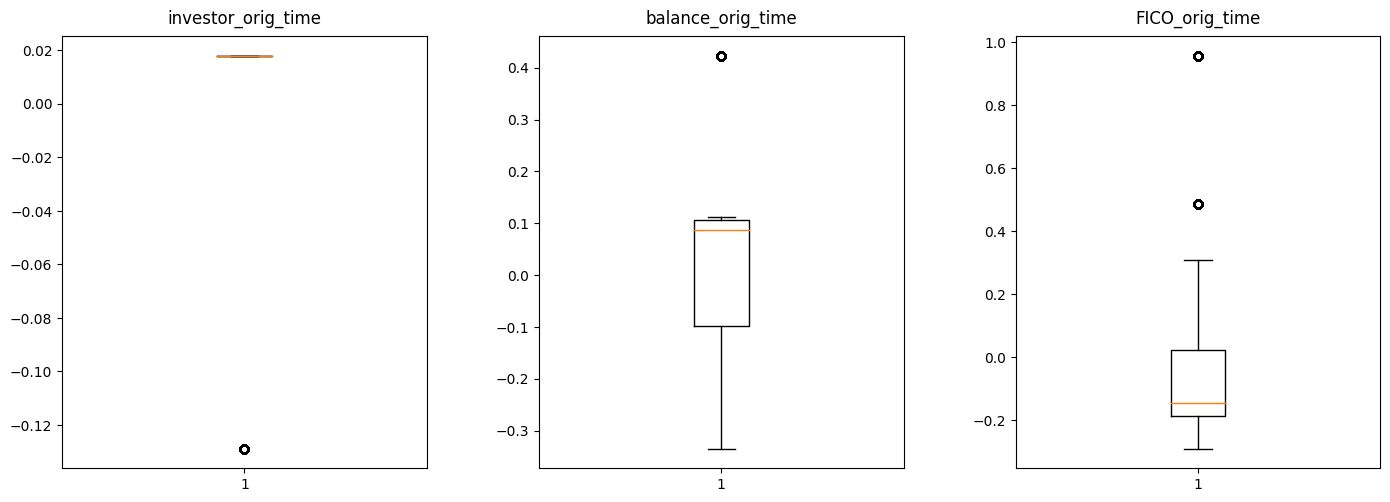

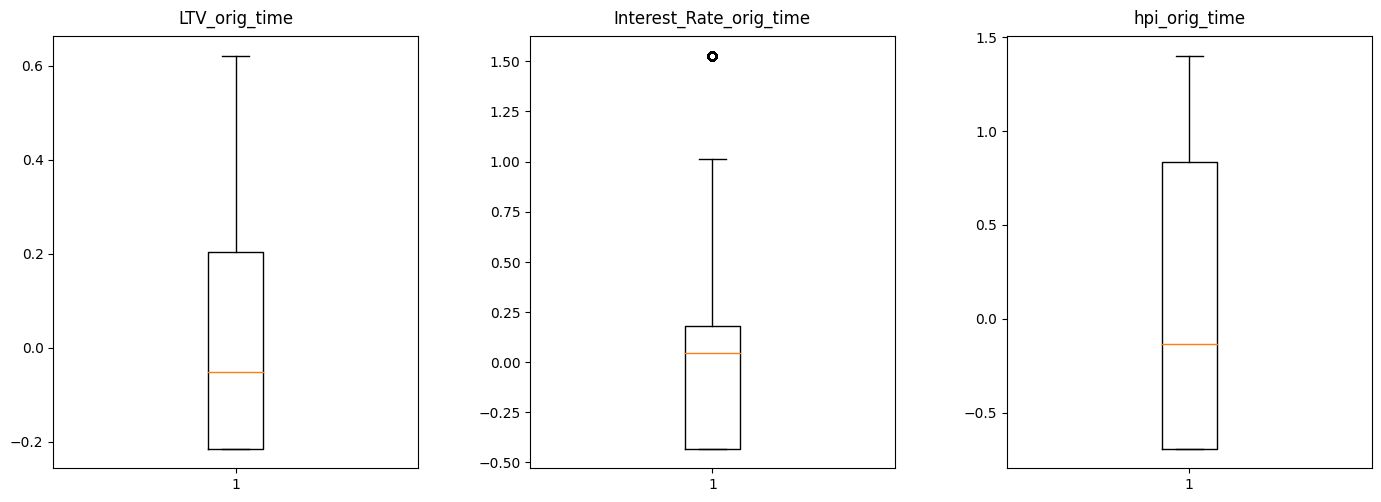

In [19]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=mort_prep_ds_path)

In [20]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=mort_prep_ds_path)

#### Plot samples count before and after Data cleaning.

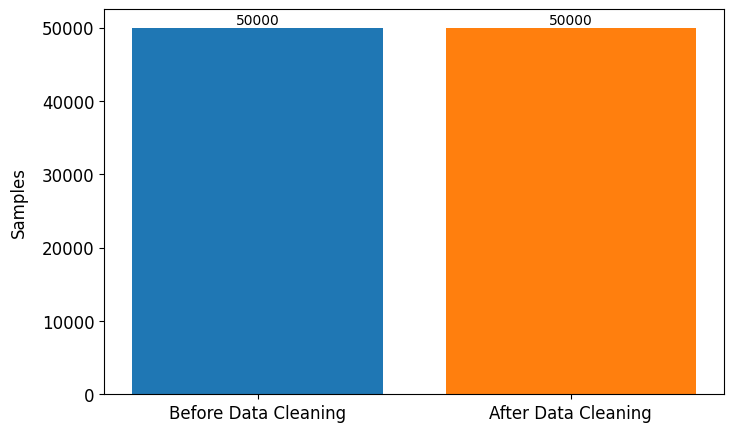

In [21]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=mort_prep_ds_path + 'before_after.pdf')

#### Features IV scores

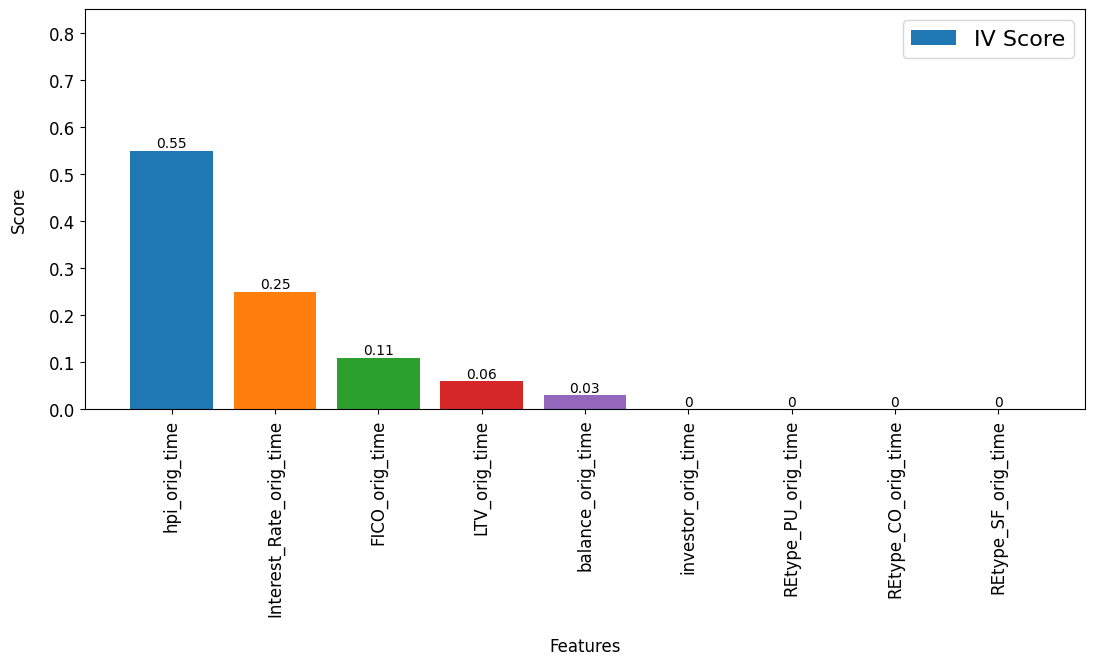

In [22]:
plotting.plot_features_scores(features_scores, '')

#### Features correlation

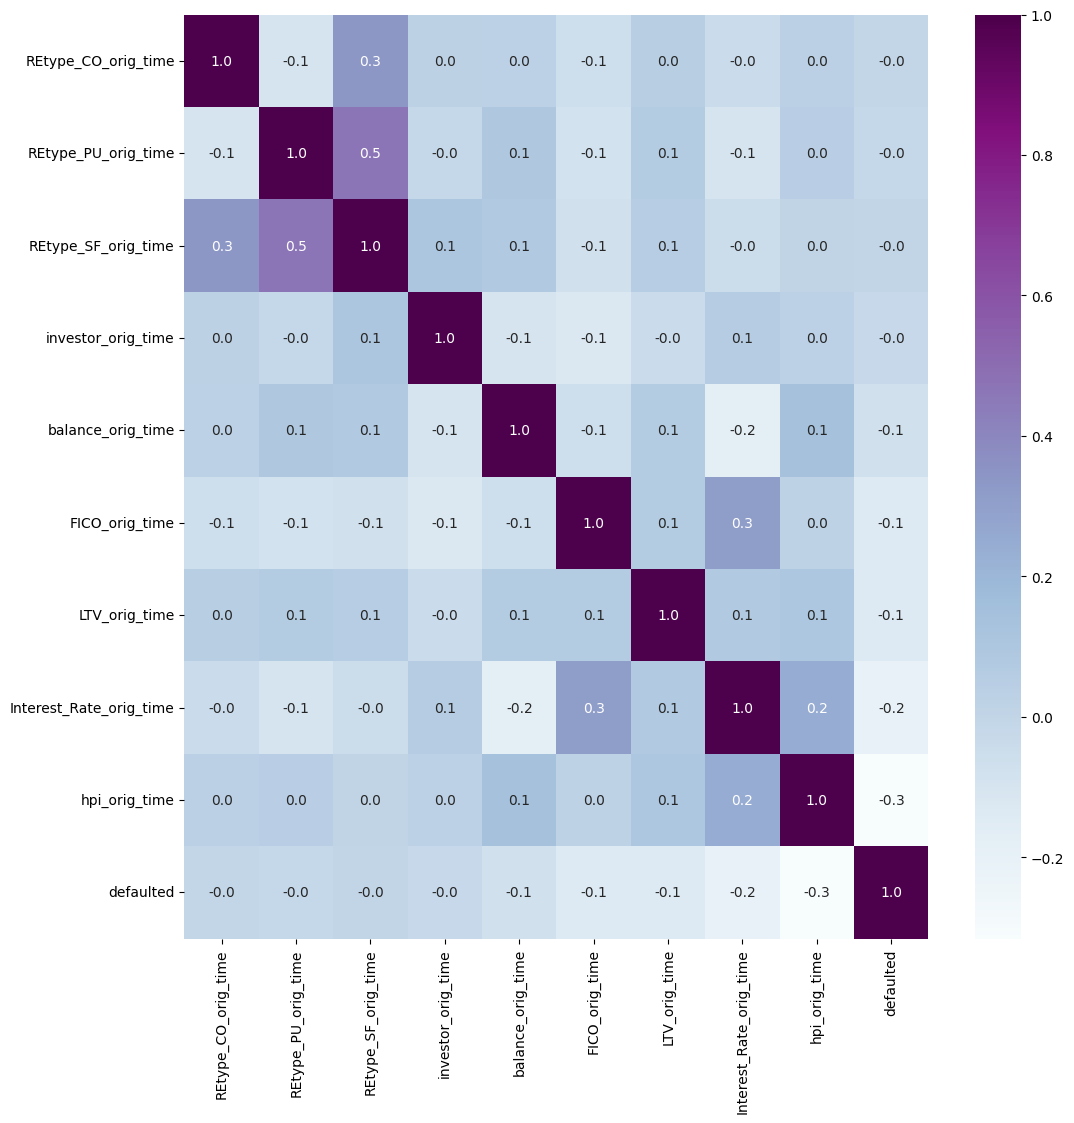

In [23]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(12, 12), save_path=mort_prep_ds_path, dpi=100)

#### No redundant features to be dropped.

#### Save preprocessed dataset.

In [24]:
data

,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,defaulted
id,,,,,,,,,,
1,0.003749,0.01048,0.001620,0.017802,0.422493,0.023485,0.620637,-0.432193,0.834084,True
2,0.003749,0.01048,0.001620,0.017802,0.106603,-0.145483,-0.214915,-0.407648,1.068886,False
3,0.003749,0.01048,0.001620,0.017802,0.422493,-0.153132,-0.051943,-0.432193,0.834084,False
4,0.003749,0.01048,0.001620,0.017802,0.111769,-0.179005,-0.051943,-0.432193,0.834084,False
5,0.003749,0.01048,0.001620,0.017802,0.422493,-0.105212,-0.214915,-0.432193,1.068886,False
...,...,...,...,...,...,...,...,...,...,...
49996,0.003749,0.01048,-0.002685,-0.128869,0.111769,0.023485,0.279597,0.042990,1.153601,False
49997,0.003749,0.01048,-0.002685,0.017802,-0.098035,0.023485,0.202926,0.042990,1.153601,False
49998,0.003749,0.01048,-0.002685,0.017802,0.086288,0.485976,-0.051943,0.042990,1.153601,False


In [25]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 50000
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REtype_CO_orig_time      50000 non-null  float64
 1   REtype_PU_orig_time      50000 non-null  float64
 2   REtype_SF_orig_time      50000 non-null  float64
 3   investor_orig_time       50000 non-null  float64
 4   balance_orig_time        50000 non-null  float64
 5   FICO_orig_time           50000 non-null  float64
 6   LTV_orig_time            50000 non-null  float64
 7   Interest_Rate_orig_time  50000 non-null  float64
 8   hpi_orig_time            50000 non-null  float64
 9   defaulted                50000 non-null  bool   
dtypes: bool(1), float64(9)
memory usage: 3.9 MB


**EMP-$p_1$:**

In [26]:
preprocessing.compute_p1(data)

0.30308

**EMP-$p_0$:**

In [27]:
preprocessing.compute_p0(data)

0.69692

In [28]:
preprocessing.save_dataset(data=data,
                           features_scores=features_scores,
                           test_size=0.2,
                           save_path=mort_prep_ds_path)

Train split size: 40000
Train split p1: 0.303075
Train split p0: 0.696925

Test split size: 10000
Test split p1: 0.3031
Test split p0: 0.6969
